In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Scaling experiments with bootstrapping

#### Widthwise

In [2]:
merged = pd.read_csv("data/bootstrap/merged.csv")
means = merged.groupby(['model', 'width_x', 'depth_x', 'dataset', 'params'])['score'].mean().reset_index()

# When depth is kept constant for mobilenet variants
mura_df_m = means.loc[(means.dataset=='mura') & (means.model=='mobile') & (means.depth_x==1.0)]
chexpert_df_m = means.loc[(means.dataset=='chexpert') & (means.model=='mobile') & (means.depth_x==1.0)]
rsna_df_m = means.loc[(means.dataset=='rsna') & (means.model=='mobile') & (means.depth_x==1.0)]

# When depth is kep constant for resnet variants
mura_df_r = means.loc[(means.dataset=='mura') & (means.model=='resdepth') & (means.depth_x==0.0)]
chexpert_df_r = means.loc[(means.dataset=='chexpert') & (means.model=='resdepth') & (means.depth_x==0.0)]
rsna_df_r = means.loc[(means.dataset=='rsna') & (means.model=='resdepth') & (means.depth_x==0.0)]

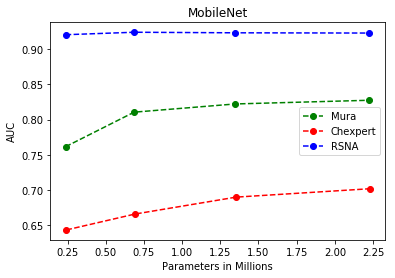

In [3]:
plt.plot(mura_df_m['params']/1e6, mura_df_m['score'], 'go--')
plt.plot(chexpert_df_m['params']/1e6, chexpert_df_m['score'], 'ro--')
plt.plot(rsna_df_m['params']/1e6, rsna_df_m['score'], 'bo--')
plt.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
plt.xlabel("Parameters in Millions")
plt.ylabel("AUC")
plt.title("MobileNet")
plt.show()

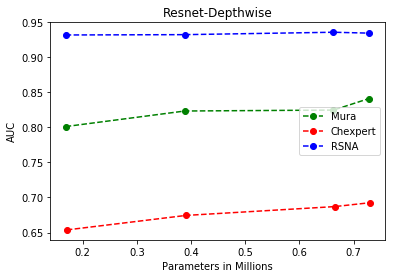

In [4]:
plt.plot(mura_df_r['params']/1e6, mura_df_r['score'], 'go--')
plt.plot(chexpert_df_r['params']/1e6, chexpert_df_r['score'], 'ro--')
plt.plot(rsna_df_r['params']/1e6, rsna_df_r['score'], 'bo--')
plt.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
plt.xlabel("Parameters in Millions")
plt.ylabel("AUC")
plt.title("Resnet-Depthwise")
plt.show()

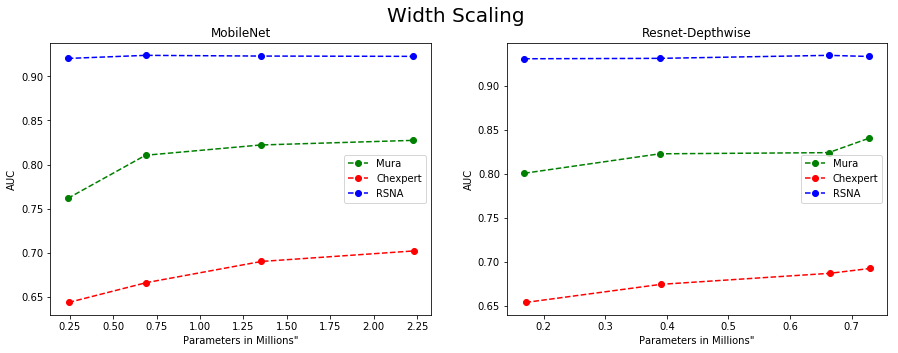

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Width Scaling', fontsize=20)

ax1.plot(mura_df_m['params']/1e6, mura_df_m['score'], 'go--')
ax1.plot(chexpert_df_m['params']/1e6, chexpert_df_m['score'], 'ro--')
ax1.plot(rsna_df_m['params']/1e6, rsna_df_m['score'], 'bo--')
ax1.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
ax1.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax1.set_title("MobileNet")

ax2.plot(mura_df_r['params']/1e6, mura_df_r['score'], 'go--')
ax2.plot(chexpert_df_r['params']/1e6, chexpert_df_r['score'], 'ro--')
ax2.plot(rsna_df_r['params']/1e6, rsna_df_r['score'], 'bo--')
ax2.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
ax2.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax2.set_title("Resnet-Depthwise")

plt.savefig("Width_Scaling.jpg", dpi=200)

#### Depthwise

In [6]:
merged = pd.read_csv("data/bootstrap/merged.csv")
means = merged.groupby(['model', 'width_x', 'depth_x', 'dataset', 'params'])['score'].mean().reset_index()

# When width is kept constant for mobilenet variants
mura_df_m = means.loc[(means.dataset=='mura') & (means.model=='mobile') & (means.width_x==1.0)]
chexpert_df_m = means.loc[(means.dataset=='chexpert') & (means.model=='mobile') & (means.width_x==1.0)]
rsna_df_m = means.loc[(means.dataset=='rsna') & (means.model=='mobile') & (means.width_x==1.0)]

# When width is kept constant for resnet variants
mura_df_r = means.loc[(means.dataset=='mura') & (means.model=='resdepth') & (means.width_x==1.0)]
mura_df_r = mura_df_r.sort_values('params')
chexpert_df_r = means.loc[(means.dataset=='chexpert') & (means.model=='resdepth') & (means.width_x==1.0)]
chexpert_df_r = chexpert_df_r.sort_values('params')
rsna_df_r = means.loc[(means.dataset=='rsna') & (means.model=='resdepth') & (means.width_x==1.0)]
rsna_df_r = rsna_df_r.sort_values('params')

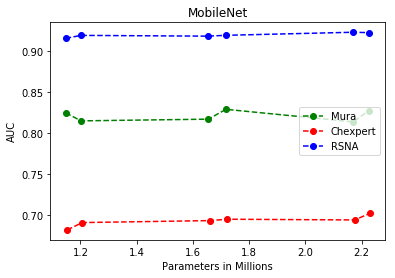

In [7]:
plt.plot(mura_df_m['params']/1e6, mura_df_m['score'], 'go--')
plt.plot(chexpert_df_m['params']/1e6, chexpert_df_m['score'], 'ro--')
plt.plot(rsna_df_m['params']/1e6, rsna_df_m['score'], 'bo--')
plt.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
plt.xlabel("Parameters in Millions")
plt.ylabel("AUC")
plt.title("MobileNet")
plt.show()

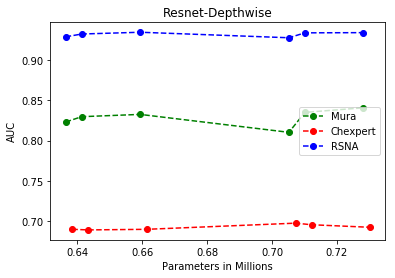

In [8]:
plt.plot(mura_df_r['params']/1e6, mura_df_r['score'], 'go--')
plt.plot(chexpert_df_r['params']/1e6, chexpert_df_r['score'], 'ro--')
plt.plot(rsna_df_r['params']/1e6, rsna_df_r['score'], 'bo--')
plt.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
plt.xlabel("Parameters in Millions")
plt.ylabel("AUC")
plt.title("Resnet-Depthwise")
plt.show()

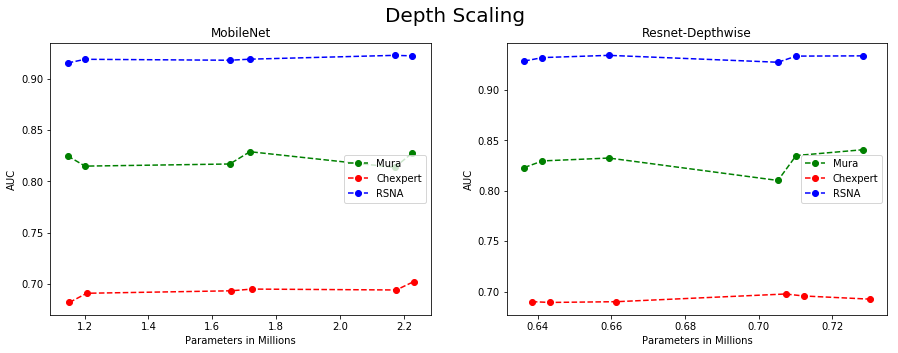

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Depth Scaling', fontsize=20)

ax1.plot(mura_df_m['params']/1e6, mura_df_m['score'], 'go--')
ax1.plot(chexpert_df_m['params']/1e6, chexpert_df_m['score'], 'ro--')
ax1.plot(rsna_df_m['params']/1e6, rsna_df_m['score'], 'bo--')
ax1.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
ax1.set(xlabel='Parameters in Millions', ylabel='AUC')
ax1.set_title("MobileNet")

ax2.plot(mura_df_r['params']/1e6, mura_df_r['score'], 'go--')
ax2.plot(chexpert_df_r['params']/1e6, chexpert_df_r['score'], 'ro--')
ax2.plot(rsna_df_r['params']/1e6, rsna_df_r['score'], 'bo--')
ax2.legend(['Mura', 'Chexpert', 'RSNA'], loc='center right')
ax2.set(xlabel='Parameters in Millions', ylabel='AUC')
ax2.set_title("Resnet-Depthwise")

plt.savefig("Depth_Scaling.jpg", dpi=200)

### Imagenet pre-trained results

In [10]:
# mobilenet variant model sizes
mapping = {'mobilenet_full': 2225153, 'mobilenet_1_0_2': 1147265, 'mobilenet_0_75_0_3': 761545,
      'mobilenet_0_5_0_5': 534305, 'mobilenet_0_25_1': 237593
     }
params = np.array([237593.0, 534305.0, 761545.0, 1147265.0, 2225153.0])

# Imagenet results with mobilenet variations
ls = np.array([0.448, 0.537, 0.544, 0.553, 0.583])

# Resnet variant model sizes
mapping2 = {'resnet_full': 728193, 'resnet_0_75_4': 649361, 'resnet_0_5_full_depth': 388417,
      'resnet_0_5_4': 382049, 'resnet_0_25_full_depth': 168353
     }
params2 = np.array([168353, 382049, 388417, 649361, 728193])

# Imagenet resulsts with resnet variants
ls2 = np.array([0.341, 0.422, 0.441, 0.474, 0.523])

In [11]:
def get_seconds(x):
    x = x.split()[-1].rstrip('0')
    date_time = datetime.datetime.strptime(x, "%H:%M:%S.%f")
    delta = date_time - datetime.datetime(1900, 1, 1)
    seconds = delta.total_seconds()

    return seconds

In [12]:
mura_df = pd.read_csv("data/imagenet_pretrained/mura_mobilenet.csv")
mura_df['time'] = mura_df['time'].apply(get_seconds)
mura_df = mura_df.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
mura_df['params'] = mura_df['model'].apply(lambda x: mapping[x])

chexpert_df = pd.read_csv("data/imagenet_pretrained/chexpert_mobilenet.csv")
chexpert_df['time'] = chexpert_df['time'].apply(get_seconds)
chexpert_df = chexpert_df.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
chexpert_df['params'] = chexpert_df['model'].apply(lambda x: mapping[x])

rsna_df = pd.read_csv("data/imagenet_pretrained/rsna_mobilenet.csv")
rsna_df['time'] = rsna_df['time'].apply(get_seconds)
rsna_df = rsna_df.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
rsna_df['params'] = rsna_df['model'].apply(lambda x: mapping[x])

In [13]:
mura_df

,model,dataset,score,time,params
0,mobilenet_0_25_1,mura,0.873851,90.105012,237593
1,mobilenet_0_5_0_5,mura,0.880151,64.782777,534305
2,mobilenet_0_75_0_3,mura,0.881341,52.380797,761545
3,mobilenet_1_0_2,mura,0.881247,49.741624,1147265
4,mobilenet_full,mura,0.892090,91.126463,2225153


In [14]:
chexpert_df

,model,dataset,score,time,params
0,mobilenet_0_25_1,chexpert,0.714714,108.878801,237593
1,mobilenet_0_5_0_5,chexpert,0.717567,80.673060,534305
2,mobilenet_0_75_0_3,chexpert,0.714578,66.914546,761545
3,mobilenet_1_0_2,chexpert,0.710569,63.992657,1147265
4,mobilenet_full,chexpert,0.717035,111.786582,2225153


In [15]:
rsna_df

,model,dataset,score,time,params
0,mobilenet_0_25_1,rsna,0.951925,101.694635,237593
1,mobilenet_0_5_0_5,rsna,0.955704,82.606562,534305
2,mobilenet_0_75_0_3,rsna,0.956654,70.866519,761545
3,mobilenet_1_0_2,rsna,0.957673,66.940940,1147265
4,mobilenet_full,rsna,0.964109,104.404649,2225153


In [16]:
mura_df_r = pd.read_csv("data/imagenet_pretrained/mura_resnet.csv")
mura_df_r['time'] = mura_df_r['time'].apply(get_seconds)
mura_df_r = mura_df_r.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
mura_df_r['params'] = mura_df_r['model'].apply(lambda x: mapping2[x])

chexpert_df_r = pd.read_csv("data/imagenet_pretrained/chexpert_resnet.csv")
chexpert_df_r['time'] = chexpert_df_r['time'].apply(get_seconds)
chexpert_df_r = chexpert_df_r.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
chexpert_df_r['params'] = chexpert_df_r['model'].apply(lambda x: mapping2[x])

rsna_df_r = pd.read_csv("data/imagenet_pretrained/rsna_resnet.csv")
rsna_df_r['time'] = rsna_df_r['time'].apply(get_seconds)
rsna_df_r = rsna_df_r.groupby(['model', 'dataset'])['score', 'time'].mean().reset_index()
rsna_df_r['params'] = rsna_df_r['model'].apply(lambda x: mapping2[x])

In [17]:
rsna_df_r

,model,dataset,score,time,params
0,resnet_0_25_full_depth,rsna,0.944313,66.154326,168353
1,resnet_0_5_4,rsna,0.948608,66.444781,382049
2,resnet_0_5_full_depth,rsna,0.951260,65.693556,388417
3,resnet_0_75_4,rsna,0.951971,63.215920,649361
4,resnet_full,rsna,0.958732,65.584590,728193


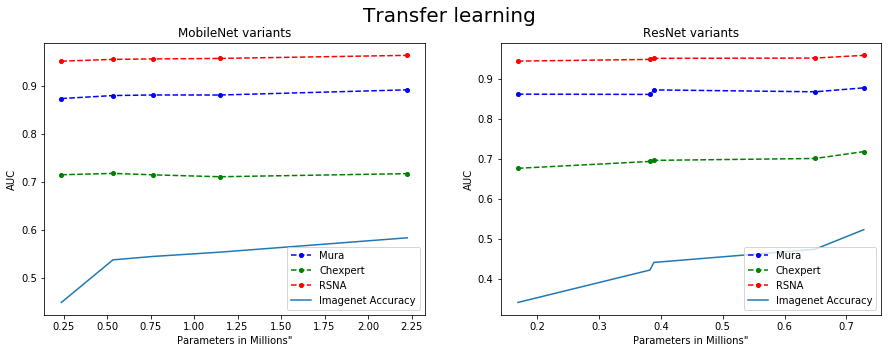

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Transfer learning', fontsize=20)

ax1.plot(mura_df['params']/1e6, mura_df['score'], 'bo--', markersize=4)
ax1.plot(chexpert_df['params']/1e6, chexpert_df['score'], 'go--', markersize=4)
ax1.plot(rsna_df['params']/1e6, rsna_df['score'], 'ro--', markersize=4)
ax1.plot(params/1e6, ls, markersize=5)
ax1.legend(['Mura', 'Chexpert', 'RSNA', 'Imagenet Accuracy'], loc='lower right')
ax1.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax1.set_title("MobileNet variants")

ax2.plot(mura_df_r['params']/1e6, mura_df_r['score'], 'bo--', markersize=4)
ax2.plot(chexpert_df_r['params']/1e6, chexpert_df_r['score'], 'go--', markersize=4)
ax2.plot(rsna_df_r['params']/1e6, rsna_df_r['score'], 'ro--', markersize=4)
ax2.plot(params2/1e6, ls2)
ax2.legend(['Mura', 'Chexpert', 'RSNA', 'Imagenet Accuracy'], loc='lower right')
ax2.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax2.set_title("ResNet variants")

plt.savefig("TransferLearning.jpg", dpi=200)

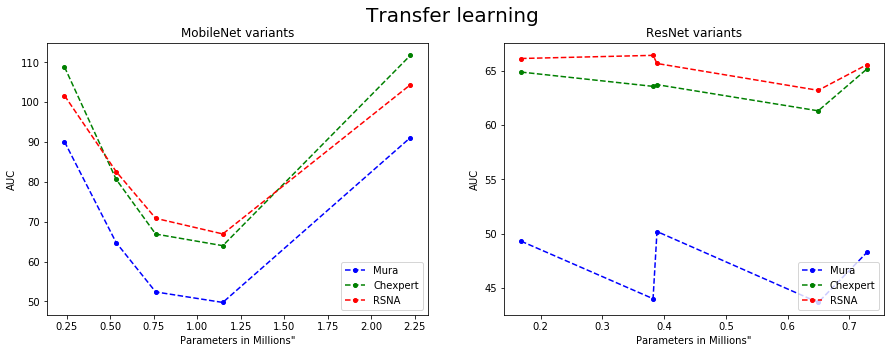

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Transfer learning', fontsize=20)

ax1.plot(mura_df['params']/1e6, mura_df['time'], 'bo--', markersize=4)
ax1.plot(chexpert_df['params']/1e6, chexpert_df['time'], 'go--', markersize=4)
ax1.plot(rsna_df['params']/1e6, rsna_df['time'], 'ro--', markersize=4)
# ax1.plot(params/1e6, ls, markersize=5)
ax1.legend(['Mura', 'Chexpert', 'RSNA'], loc='lower right')
ax1.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax1.set_title("MobileNet variants")

ax2.plot(mura_df_r['params']/1e6, mura_df_r['time'], 'bo--', markersize=4)
ax2.plot(chexpert_df_r['params']/1e6, chexpert_df_r['time'], 'go--', markersize=4)
ax2.plot(rsna_df_r['params']/1e6, rsna_df_r['time'], 'ro--', markersize=4)
# ax2.plot(params2/1e6, ls2)
ax2.legend(['Mura', 'Chexpert', 'RSNA'], loc='lower right')
ax2.set(xlabel='Parameters in Millions"', ylabel='AUC')
ax2.set_title("ResNet variants")

plt.savefig("TransferLearning.jpg", dpi=200)

### Confidence intervals for the diffrence in performance

In [16]:
chexpert = pd.read_csv("data/imagenet_pretrained/chexpert_pairwise.csv")
mura = pd.read_csv("data/imagenet_pretrained/mura_pairwise.csv")
rsna = pd.read_csv("data/imagenet_pretrained/rsna_pairwise.csv")

In [17]:
def df_transform(df):

    df['diff1'] = df['score'] - df['score1']
    df['diff2'] = df['score'] - df['score2']
    df['diff3'] = df['score'] - df['score3']
    df['diff4'] = df['score'] - df['score4']
    
    return df

In [18]:
chexpert = df_transform(chexpert)
mura = df_transform(mura)
rsna = df_transform(rsna)

In [19]:
from scipy.stats import sem, t
from scipy import mean

In [20]:
def start(data):
    n = len(data)
    m = mean(data)
    std_err = np.std(data)

    h = 1.96 * std_err / np.sqrt(n)
    return np.round(m-h,3), np.round(m+h,3)

In [21]:
def get_intervals(df):
    return df.groupby('model')[['diff1', 'diff2', 'diff3', 'diff4']].agg([lambda grp: start(grp)])

In [22]:
get_intervals(chexpert)

,diff1,diff2,diff3,diff4
,<lambda>,<lambda>,<lambda>,<lambda>
model,,,,
mobilenet,"(0.001, 0.002)","(-0.002, 0.0)","(0.007, 0.009)","(0.008, 0.009)"
resnet,"(0.043, 0.045)","(0.022, 0.023)","(0.013, 0.015)","(0.016, 0.018)"


In [23]:
get_intervals(mura)

,diff1,diff2,diff3,diff4
,<lambda>,<lambda>,<lambda>,<lambda>
model,,,,
mobilenet,"(0.019, 0.023)","(0.014, 0.017)","(0.011, 0.014)","(0.01, 0.012)"
resnet,"(0.017, 0.02)","(0.006, 0.009)","(-0.008, -0.005)","(0.006, 0.009)"


In [24]:
get_intervals(rsna)

,diff1,diff2,diff3,diff4
,<lambda>,<lambda>,<lambda>,<lambda>
model,,,,
mobilenet,"(0.012, 0.013)","(0.009, 0.01)","(0.008, 0.008)","(0.008, 0.008)"
resnet,"(0.014, 0.015)","(0.01, 0.011)","(0.008, 0.008)","(0.007, 0.007)"
